In [2]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
import numpy as np
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df_x=df.drop('Outcome',axis=1)
df_y=df['Outcome']

In [8]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
x_sm,y_sm=smk.fit_resample(df_x,df_y)


In [9]:
x_sm.shape

(952, 8)

In [10]:
y_sm.shape

(952,)

In [11]:
#oversampling
from imblearn.over_sampling import RandomOverSampler  
from collections import Counter

over_sampler = RandomOverSampler(0.8)
x_train, y_train = over_sampler.fit_resample(df_x,df_y)
print('the no. of classes before fit{}'.format(Counter(df_y)))
print('the no. of classes after fit{}'.format(Counter(y_train)))


the no. of classes before fitCounter({0: 500, 1: 268})
the no. of classes after fitCounter({0: 500, 1: 400})


C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [12]:
import numpy as np
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    
    print("no. of zeros in ",feature,"{}".format(df[feature][df[feature]==0].count()))

no. of zeros in  Pregnancies 111
no. of zeros in  Glucose 5
no. of zeros in  BloodPressure 35
no. of zeros in  SkinThickness 227
no. of zeros in  Insulin 374
no. of zeros in  BMI 11
no. of zeros in  DiabetesPedigreeFunction 0
no. of zeros in  Age 0


In [13]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
train_df = pd.concat([x_train, y_train], axis = 1)

In [15]:
print(train_df.shape)
train_df.columns

(900, 9)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


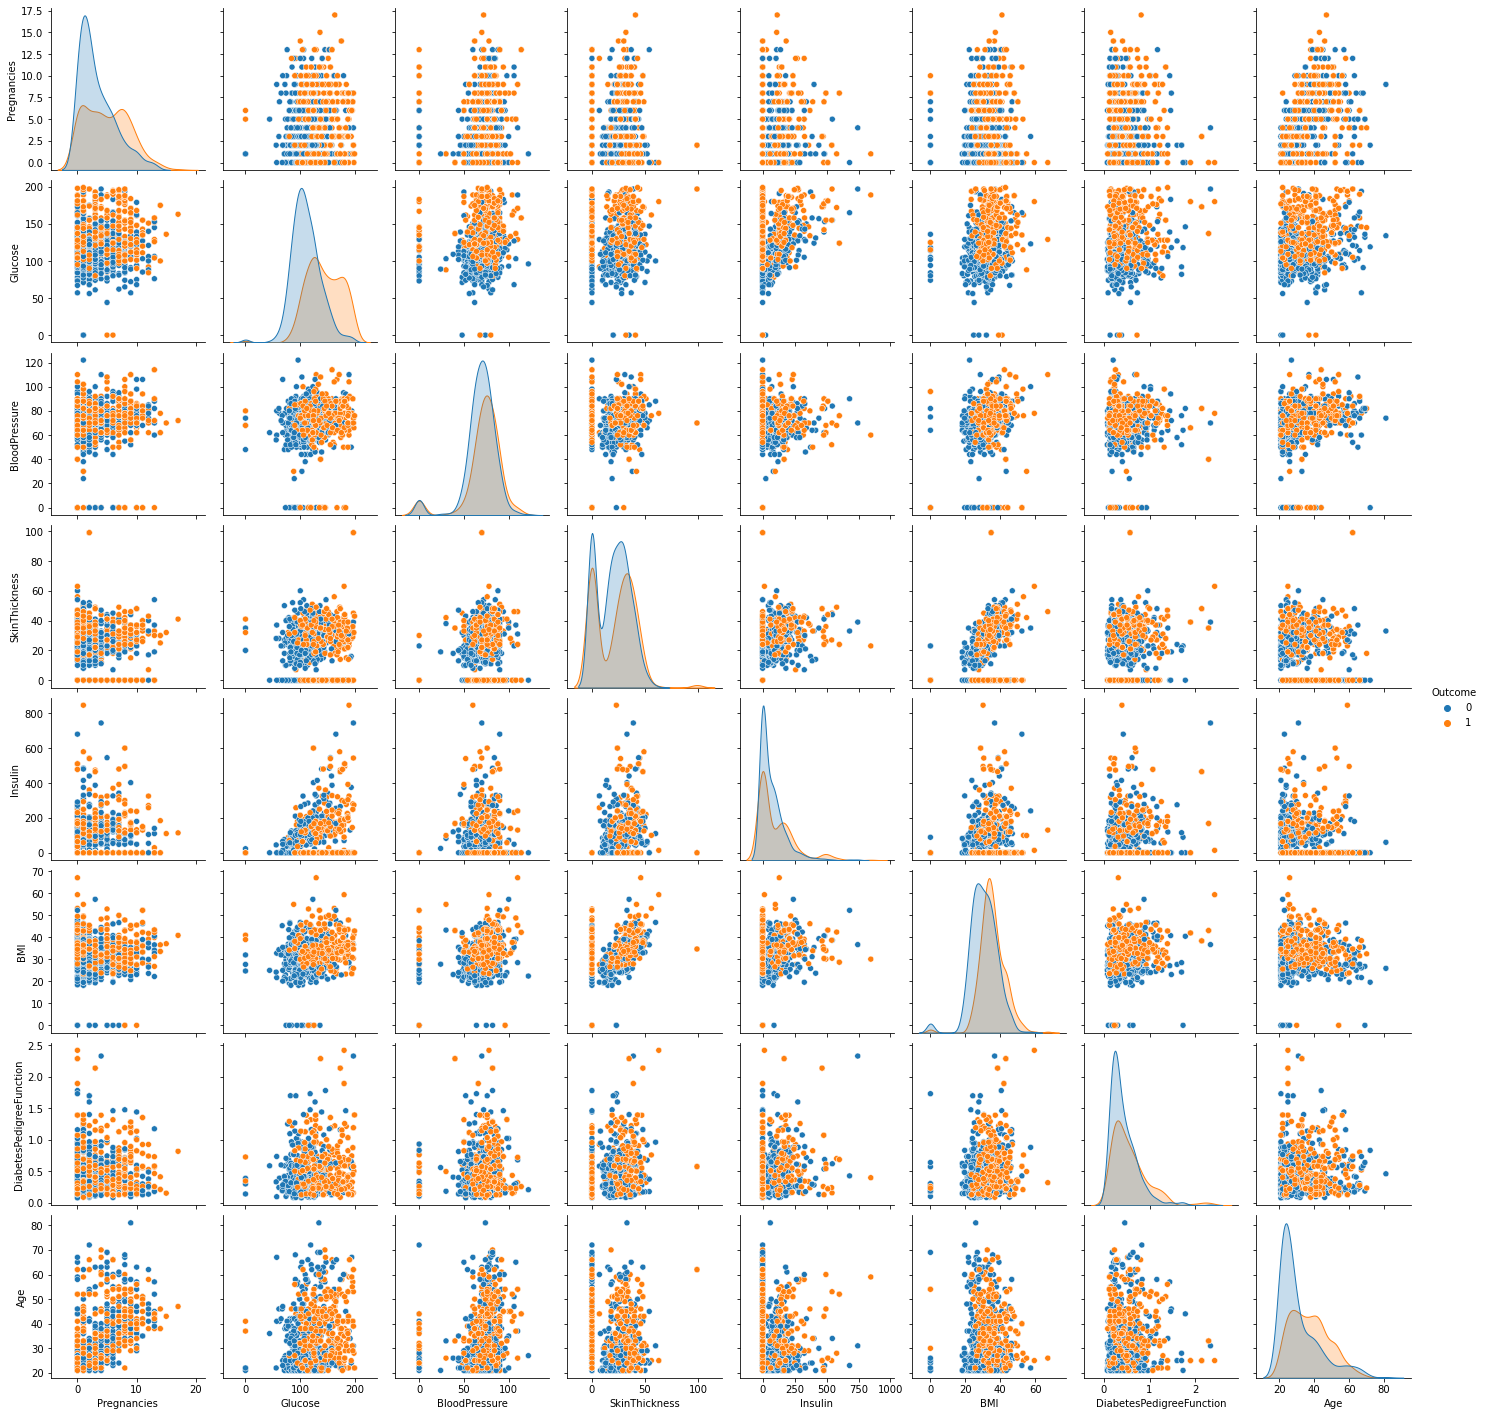

In [16]:
import seaborn as sns

sns.pairplot(train_df, hue='Outcome', size=2.5)

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

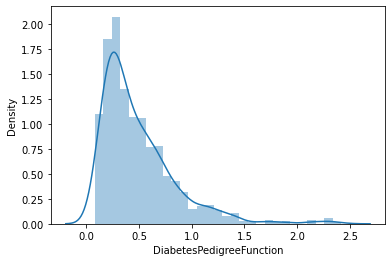

In [17]:
sns.distplot(train_df['DiabetesPedigreeFunction'])

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

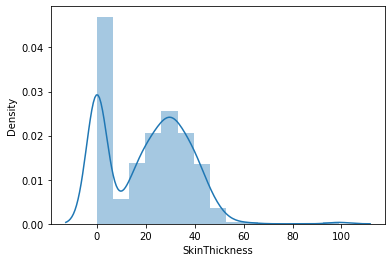

In [18]:
import seaborn as sns
sns.distplot(train_df['SkinThickness'])

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

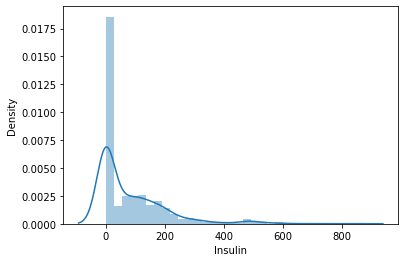

In [19]:
import seaborn as sns
sns.distplot(train_df['Insulin'])

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

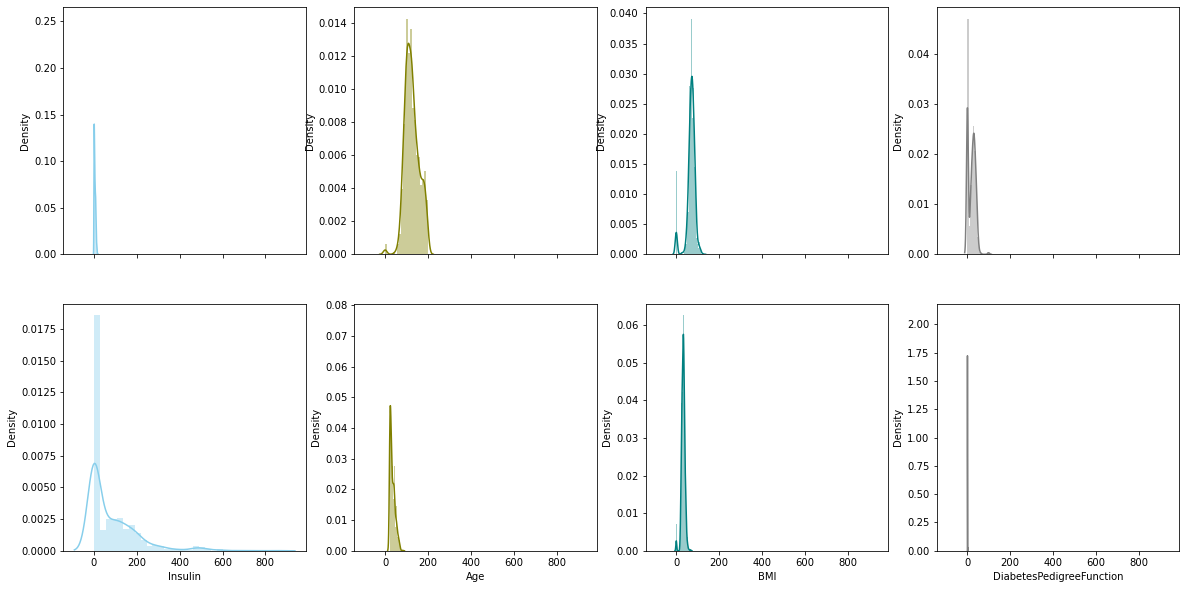

In [20]:
# plot
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True)
sns.distplot( train_df["Pregnancies"] , color="skyblue", ax=axes[0, 0])
sns.distplot( train_df['Glucose'] , color="olive", ax=axes[0, 1])
sns.distplot( train_df['BloodPressure'] , color="teal", ax=axes[0, 2])
sns.distplot( train_df['SkinThickness'] , color="grey", ax=axes[0, 3])
sns.distplot( train_df['Insulin'] , color="skyblue", ax=axes[1, 0])
sns.distplot( train_df['Age'] , color="olive", ax=axes[1, 1])
sns.distplot( train_df['BMI'] , color="teal", ax=axes[1, 2])
sns.distplot( train_df['DiabetesPedigreeFunction'] , color="grey", ax=axes[1, 3])

In [21]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
print((train_df['BloodPressure']==0).sum())
print(train_df.isnull().sum())

41
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
random_sample=train_df['SkinThickness'].dropna().sample((train_df['SkinThickness']==0).sum(),random_state=0)


In [24]:
print(random_sample.count())

random_sample

279


492    38
141    30
409    49
31     36
570     0
       ..
727    26
628     0
733    27
64      0
718    46
Name: SkinThickness, Length: 279, dtype: int64

In [25]:
def impute_zero(x,variable):
    #x[variable+"_median"]=x[variable]
    #x.loc[x[variable]==0,variable+'_median']=median
    #x[variable+"_median"]=x[variable].fillna(median)
    x[variable+"_random"]=x[variable]
    ##It will have the random sample to fill the 0
    random_sample=pd.DataFrame(x.loc[x[variable]!=0,variable].values).sample((x[variable]==0).sum())
    ##pandas need to have same index in order to merge the dataset
    for i,j in zip(x.loc[x[variable]==0].index, random_sample.values):
        print(i,j)
        x[variable+"_random"][i]=j
    #random_sample.index=x[x[variable]==0].index
    #x.loc[x[variable]==0,variable+'_random']=random_sample

In [26]:
x_train["SkinThickness_random"]=x_train["SkinThickness"]
random_sample=pd.DataFrame(x_train.loc[x_train['SkinThickness']!=0,'SkinThickness'].values).sample((x_train['SkinThickness']==0).sum())
random_sample
for i,j in zip(x_train.loc[x_train['SkinThickness']==0].index, random_sample.values):
        print(i,j)
        x_train["SkinThickness_random"][i]=j
#(x['SkinThickness_random'][49])

2 [28]
5 [42]
7 [14]
9 [17]
10 [36]
11 [27]
12 [23]
15 [40]
17 [15]
21 [16]
22 [24]
26 [19]
29 [32]
33 [19]
36 [45]
41 [49]
44 [39]
46 [41]
49 [28]
58 [52]
60 [33]
61 [29]
62 [27]
64 [30]
67 [10]
72 [39]
76 [22]
78 [19]
81 [44]
84 [22]
90 [37]
93 [27]
100 [23]
101 [24]
102 [26]
104 [28]
106 [20]
113 [40]
115 [21]
116 [22]
117 [25]
123 [18]
124 [31]
129 [48]
131 [23]
138 [32]
140 [18]
143 [44]
148 [46]
151 [24]
154 [30]
164 [29]
167 [23]
168 [37]
170 [39]
176 [17]
178 [32]
179 [25]
180 [48]
183 [33]
184 [42]
190 [11]
192 [24]
193 [30]
196 [31]
201 [32]
207 [7]
219 [20]


<ipython-input-26-6d4e6f483b98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["SkinThickness_random"][i]=j


221 [29]
222 [39]
226 [41]
230 [48]
233 [30]
235 [19]
239 [24]
242 [38]
246 [23]
250 [32]
251 [46]
261 [20]
264 [27]
266 [27]
268 [18]
269 [40]
272 [22]
274 [8]
278 [37]
280 [18]
283 [12]
284 [20]
294 [32]
299 [44]
300 [23]
303 [28]
304 [21]
317 [44]
319 [18]
327 [24]
332 [39]
333 [35]
336 [43]
337 [39]
339 [36]
343 [25]
344 [36]
347 [34]
350 [23]
351 [29]
354 [27]
355 [31]
361 [32]
363 [19]
366 [40]
378 [32]
391 [40]
394 [39]
398 [32]
400 [31]
401 [25]
404 [19]
406 [30]
407 [24]
408 [33]
418 [47]
426 [31]
430 [43]
433 [27]
435 [32]
437 [32]
439 [35]
443 [29]
451 [40]
453 [26]
456 [23]
461 [38]
464 [33]
468 [46]
473 [44]
474 [18]
484 [56]
489 [32]
494 [26]
495 [50]
496 [21]
505 [32]
509 [30]
512 [36]
513 [29]
517 [35]
518 [23]
522 [36]
523 [22]
524 [36]
529 [30]
531 [27]
533 [22]
535 [27]
536 [29]
537 [18]
552 [10]
557 [41]
559 [28]
560 [33]
564 [37]
570 [35]
571 [29]
577 [24]
578 [12]
583 [29]
586 [18]
587 [32]
589 [17]
592 [35]
596 [23]
598 [19]
601 [30]
604 [21]
615 [22]
616 [37]
61

In [27]:
x_train.loc[x_train['SkinThickness']==0].index

Int64Index([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,
            ...
            874, 875, 877, 880, 888, 889, 890, 894, 896, 897],
           dtype='int64', length=279)

In [29]:
 median=x_train.BloodPressure.median()

In [ ]:
median

In [ ]:
#impute_zero(x,'BloodPressure',median)

In [ ]:
train_df.columns

In [31]:
temp=train_df.loc[train_df["Pregnancies"]==0,"Age"].values
temp

array([33, 31, 25, 31, 44, 22, 38, 26, 22, 21, 24, 25, 23, 62, 21, 22, 29,
       21, 27, 32, 26, 23, 21, 32, 24, 24, 21, 26, 24, 23, 27, 23, 25, 25,
       21, 23, 28, 21, 25, 65, 24, 30, 21, 25, 22, 36, 26, 44, 21, 21, 21,
       22, 35, 22, 22, 25, 21, 21, 25, 26, 29, 41, 25, 26, 22, 26, 25, 21,
       22, 25, 22, 22, 59, 29, 23, 31, 24, 58, 35, 21, 22, 31, 24, 46, 67,
       23, 28, 27, 33, 21, 25, 22, 46, 27, 24, 21, 21, 21, 24, 27, 22, 23,
       25, 26, 22, 22, 21, 22, 21, 26, 52, 35, 24, 21, 26, 22, 31, 25, 33,
       31, 38, 52, 25, 25, 62, 26, 24, 22, 21, 33, 26], dtype=int64)

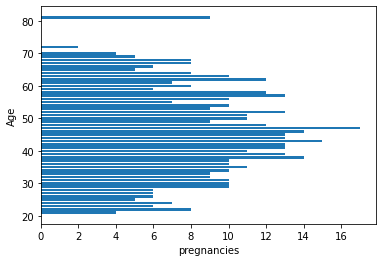

In [32]:
plt.barh(train_df['Age'],train_df['Pregnancies'])
plt.xlabel("pregnancies")
plt.ylabel("Age")
plt.show()

In [33]:
features_x=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']

for feature in features_x:
    impute_zero(train_df,feature)

75 [146]
182 [196]
342 [167]
349 [112]
502 [114]
7 [78]
15 [62]
49 [68]
60 [90]
78 [70]
81 [88]
172 [74]
193 [104]
222 [76]
261 [76]
266 [66]
269 [78]
300 [70]
332 [66]
336 [62]
347 [72]
357 [78]
426 [72]
430 [64]
435 [84]
453 [74]
468 [88]
484 [60]
494 [78]
522 [68]
533 [74]
535 [88]
589 [40]
601 [78]
604 [70]
619 [84]
643 [68]
697 [68]
703 [72]
706 [90]
803 [80]
811 [66]
819 [102]
836 [70]
859 [68]
867 [58]
2 [36]
5 [29]
7 [28]
9 [35]
10 [32]
11 [26]
12 [44]
15 [51]
17 [37]
21 [17]
22 [15]
26 [40]
29 [29]
33 [40]
36 [27]
41 [35]
44 [33]
46 [35]
49 [27]
58 [12]
60 [46]
61 [30]
62 [14]
64 [31]
67 [27]
72 [24]
76 [15]
78 [24]
81 [99]
84 [22]
90 [26]
93 [38]
100 [24]
101 [26]
102 [11]
104 [33]
106 [19]
113 [26]
115 [18]
116 [32]
117 [42]
123 [25]
124 [30]
129 [39]
131 [23]
138 [45]
140 [32]
143 [40]
148 [50]
151 [23]
154 [60]
164 [34]
167 

<ipython-input-25-d3448b94b97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[variable+"_random"][i]=j
<ipython-input-25-d3448b94b97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[variable+"_random"][i]=j
<ipython-input-25-d3448b94b97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[variable+"_random"][i]=j


[11]
168 [23]
170 [39]
176 [46]
178 [35]
179 [28]
180 [14]
183 [40]
184 [45]
190 [21]
192 [39]
193 [32]
196 [41]
201 [26]
207 [30]
219 [41]
221 [46]
222 [27]
226 [36]
230 [32]
233 [29]
235 [11]
239 [24]
242 [31]
246 [32]
250 [7]
251 [42]
261 [22]
264 [35]
266 [15]
268 [31]
269 [46]
272 [22]
274 [24]
278 [32]
280 [32]
283 [39]
284 [28]
294 [22]
299 [25]
300 [40]
303 [46]
304 [41]
317 [37]
319 [11]
327 [16]
332 [39]
333 [38]
336 [14]
337 [8]
339 [18]
343 [39]
344 [35]
347 [54]
350 [22]
351 [39]
354 [34]
355 [33]
361 [41]
363 [30]
366 [15]
378 [25]
391 [22]
394 [12]
398 [20]
400 [20]
401 [31]
404 [33]
406 [19]
407 [37]
408 [43]
418 [18]
426 [38]
430 [13]
433 [12]
435 [44]
437 [22]
439 [28]
443 [22]
451 [42]
453 [29]
456 [42]
461 [30]
464 [41]
468 [28]
473 [24]
474 [23]
484 [30]
489 [30]
494 [40]
495 [31]
496 [36]
505 [21]
509 [30]
512 [16]
513 [37]
517 [37]
518 [27]
522 [21]
523 [15]
524 [46]
529 [21]
531 [19]
533 [35]
535 [24]
536 [40]
537 [17]
552 [32]
557 [33]
559 [27]
560 [32]
564 [19

<ipython-input-25-d3448b94b97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[variable+"_random"][i]=j


 [110]
45 [321]
46 [387]
47 [142]
48 [192]
49 [94]
55 [108]
58 [120]
60 [132]
61 [106]
62 [182]
64 [178]
65 [480]
66 [78]
67 [120]
72 [194]
74 [180]
75 [115]
76 [130]
77 [63]
78 [140]
79 [135]
80 [510]
81 [249]
83 [171]
84 [58]
86 [83]
89 [15]
90 [66]
93 [88]
96 [105]
100 [185]
101 [190]
102 [318]
104 [207]
106 [130]
113 [54]
115 [200]
116 [92]
117 [105]
118 [48]
121 [200]
123 [210]
124 [342]
129 [180]
131 [67]
133 [335]
138 [56]
140 [258]
141 [293]
143 [126]
145 [144]
146 [148]
148 [145]
149 [120]
151 [115]
154 [140]
155 [225]
160 [126]
163 [122]
164 [74]
166 [240]
167 [165]
168 [49]
170 [140]
172 [105]
176 [180]
178 [130]
179 [185]
180 [50]
183 [110]
184 [180]
185 [53]
190 [480]
192 [14]
193 [42]
194 [79]
196 [200]
200 [126]
201 [192]
202 [478]
205 [44]
207 [100]
209 [200]
210 [176]
211 [125]
212 [270]
218 [76]
219 [180]
221 [230]
222 [75]
226 [225]
227 [150]
230 [29]
233 [122]
235 [170]
237 [76]
238 [215]
239 [74]
240 [325]
242 [114]
245 [64]
246 [265]
249 [83]
250 [82]
251 [56]
253

<ipython-input-25-d3448b94b97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[variable+"_random"][i]=j


In [35]:
print(train_df.columns)
train_df["Glucose_random"].isnull().sum()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_random',
       'BloodPressure_random', 'SkinThickness_random', 'Insulin_random',
       'BMI_random', 'DiabetesPedigreeFunction_random', 'Age_random'],
      dtype='object')


0

In [36]:
train_df["SkinThickness"].isnull().sum()

0

Text(0.5, 1.0, 'Pregnancies')

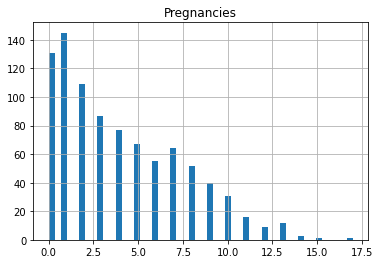

In [37]:
figure=train_df.Pregnancies.hist(bins=50)
figure.set_title('Pregnancies')

In [38]:
train_X=train_df.drop([ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],axis=1)
#train_X=pd.concat([train_x,y],axis=1)
train_X.columns

Index(['Pregnancies', 'Outcome', 'Glucose_random', 'BloodPressure_random',
       'SkinThickness_random', 'Insulin_random', 'BMI_random',
       'DiabetesPedigreeFunction_random', 'Age_random'],
      dtype='object')

In [39]:
import numpy as np
features=[ 'Glucose_random', 'BloodPressure_random', 'SkinThickness_random', 'Insulin_random',
       'BMI_random', 'DiabetesPedigreeFunction_random', 'Age_random','Pregnancies']
for feature in features:
    
    print("no. of zeros in ",feature,"{}".format(train_X[feature][train_X[feature]==0].count()))

no. of zeros in  Glucose_random 0
no. of zeros in  BloodPressure_random 0
no. of zeros in  SkinThickness_random 0
no. of zeros in  Insulin_random 0
no. of zeros in  BMI_random 0
no. of zeros in  DiabetesPedigreeFunction_random 0
no. of zeros in  Age_random 0
no. of zeros in  Pregnancies 131


<AxesSubplot:ylabel='Age_random'>

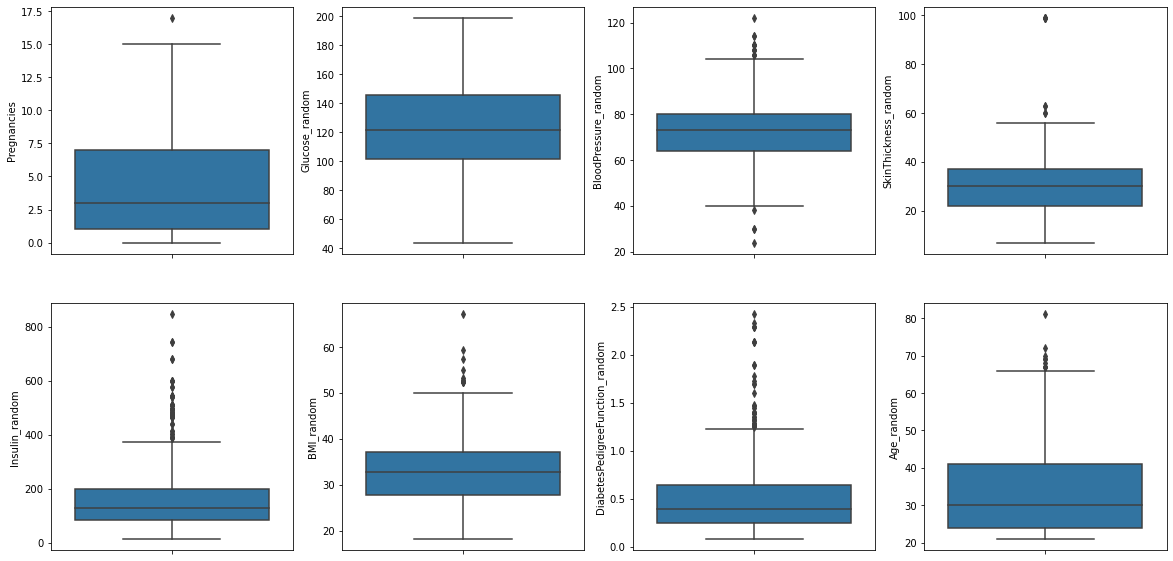

In [40]:
f, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True)
sns.boxplot(y='Pregnancies', data=train_X,ax=axes[0,0])
sns.boxplot(y='Glucose_random',data=train_X,ax=axes[0,1])
sns.boxplot(y='BloodPressure_random',data=train_X,ax=axes[0,2])
sns.boxplot(y='SkinThickness_random',data=train_X,ax=axes[0,3])
sns.boxplot(y='Insulin_random',data=train_X,ax=axes[1,0])
sns.boxplot(y='BMI_random',data=train_X,ax=axes[1,1])
sns.boxplot(y='DiabetesPedigreeFunction_random',data=train_X,ax=axes[1,2])
sns.boxplot(y='Age_random',data=train_X,ax=axes[1,3])

In [41]:
data=train_X.copy()
train_X.columns

Index(['Pregnancies', 'Outcome', 'Glucose_random', 'BloodPressure_random',
       'SkinThickness_random', 'Insulin_random', 'BMI_random',
       'DiabetesPedigreeFunction_random', 'Age_random'],
      dtype='object')

In [42]:
train_X["SkinThickness_random"].isnull().sum()

0

In [43]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
def remove_outliers(x,variable):
   uppper_boundary=x[variable].mean() + 3* x[variable].std()
   lower_boundary=x[variable].mean() - 3* x[variable].std()
   print(variable+"_lower :",lower_boundary)
   print(variable+"_upper :",uppper_boundary)
   print("maen",x[variable].mean())
   
   x.loc[x[variable]>=uppper_boundary,variable]=uppper_boundary
   x.loc[x[variable]<=lower_boundary,variable]=lower_boundary

In [44]:
gaussian_feature=["BloodPressure_random","Glucose_random","BMI_random","SkinThickness_random"]
for g_feature in gaussian_feature:
  remove_outliers(data,g_feature)

BloodPressure_random_lower : 35.778537396663
BloodPressure_random_upper : 110.4103514922259
maen 73.09444444444445
Glucose_random_lower : 29.91692512358162
Glucose_random_upper : 221.22974154308505
maen 125.57333333333334
BMI_random_lower : 12.049096890117877
BMI_random_upper : 53.920236443215444
maen 32.98466666666666
SkinThickness_random_lower : -3.616086835226895
SkinThickness_random_upper : 63.149420168560226
maen 29.766666666666666


In [45]:
data["SkinThickness_random"].isnull().sum()

0

Text(0, 0.5, 'No of patient')

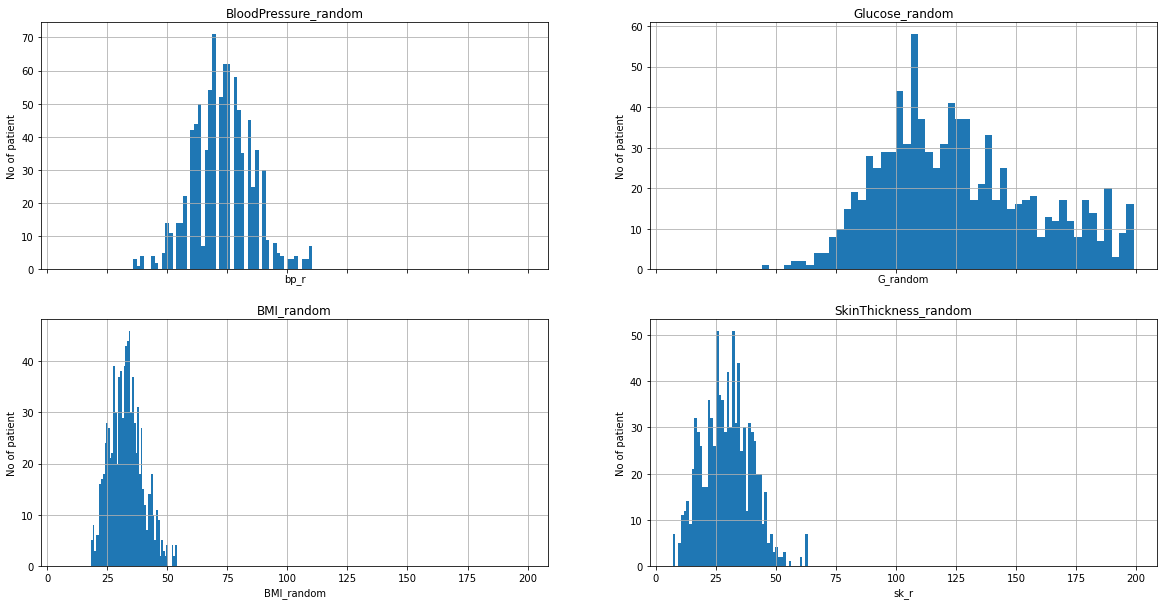

In [46]:

f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
figure=data.BloodPressure_random.hist(bins=50,ax=axes[0,0])
figure.set_title('BloodPressure_random')
figure.set_xlabel('bp_r')
figure.set_ylabel('No of patient')
figure=data.Glucose_random.hist(bins=50,ax=axes[0,1])
figure.set_title('Glucose_random')
figure.set_xlabel('G_random')
figure.set_ylabel('No of patient')

figure=data.BMI_random.hist(bins=50,ax=axes[1,0])
figure.set_title('BMI_random')
figure.set_xlabel('BMI_random')
figure.set_ylabel('No of patient')
figure=data.SkinThickness_random.hist(bins=50,ax=axes[1,1])
figure.set_title('SkinThickness_random')
figure.set_xlabel('sk_r')
figure.set_ylabel('No of patient')





In [47]:
#extreme outliers
def remove_outliers_skewed(x,variable):
    #### Lets compute the Interquantile range to calculate the boundaries
  IQR=x[variable].quantile(0.75)-x[variable].quantile(0.25)
  #### Extreme outliers
  lower_bridge=x[variable].quantile(0.25)-(IQR*3)
  upper_bridge=x[variable].quantile(0.75)+(IQR*3)
  print("lower_bridge:", variable,lower_bridge), print("upper_bridge:",upper_bridge),print("maen",data[variable].mean())
  x.loc[x[variable]>=upper_bridge,variable]=upper_bridge
  x.loc[x[variable]<=lower_bridge,variable]=lower_bridge


In [48]:
skewed_feature=['DiabetesPedigreeFunction_random',  'Insulin_random','Age_random', 'Pregnancies']
for sf in skewed_feature:
    remove_outliers_skewed(data,sf)
    

lower_bridge: DiabetesPedigreeFunction_random -0.9407499999999999
upper_bridge: 1.82775
maen 0.4902988888888889
lower_bridge: Insulin_random -268.0
upper_bridge: 551.0
maen 163.06333333333333
lower_bridge: Age_random -27.0
upper_bridge: 92.0
maen 34.044444444444444
lower_bridge: Pregnancies -17.0
upper_bridge: 25.0
maen 4.05


Text(0.5, 1.0, 'Pregnancies')

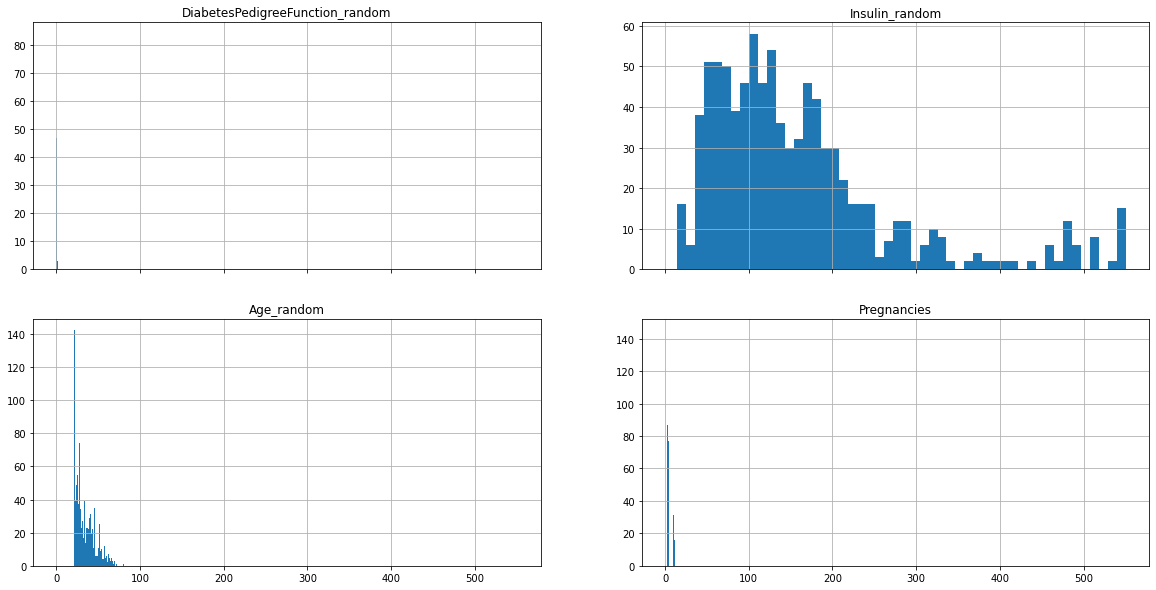

In [49]:

#major_trick=(0,100,20)
#m_trick=(0,1,.1)
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
figure=data.DiabetesPedigreeFunction_random.hist(bins=50,ax=axes[0,0],)
figure.set_title('DiabetesPedigreeFunction_random')
axes

figure=data.Insulin_random.hist(bins=50,ax=axes[0,1])
figure.set_title('Insulin_random')


figure=data.Age_random.hist(bins=50,ax=axes[1,0])
figure.set_title('Age_random')
figure=data.Pregnancies.hist(bins=50,ax=axes[1,1])
figure.set_title('Pregnancies')





In [50]:
data.columns

Index(['Pregnancies', 'Outcome', 'Glucose_random', 'BloodPressure_random',
       'SkinThickness_random', 'Insulin_random', 'BMI_random',
       'DiabetesPedigreeFunction_random', 'Age_random'],
      dtype='object')

In [51]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

<AxesSubplot:>

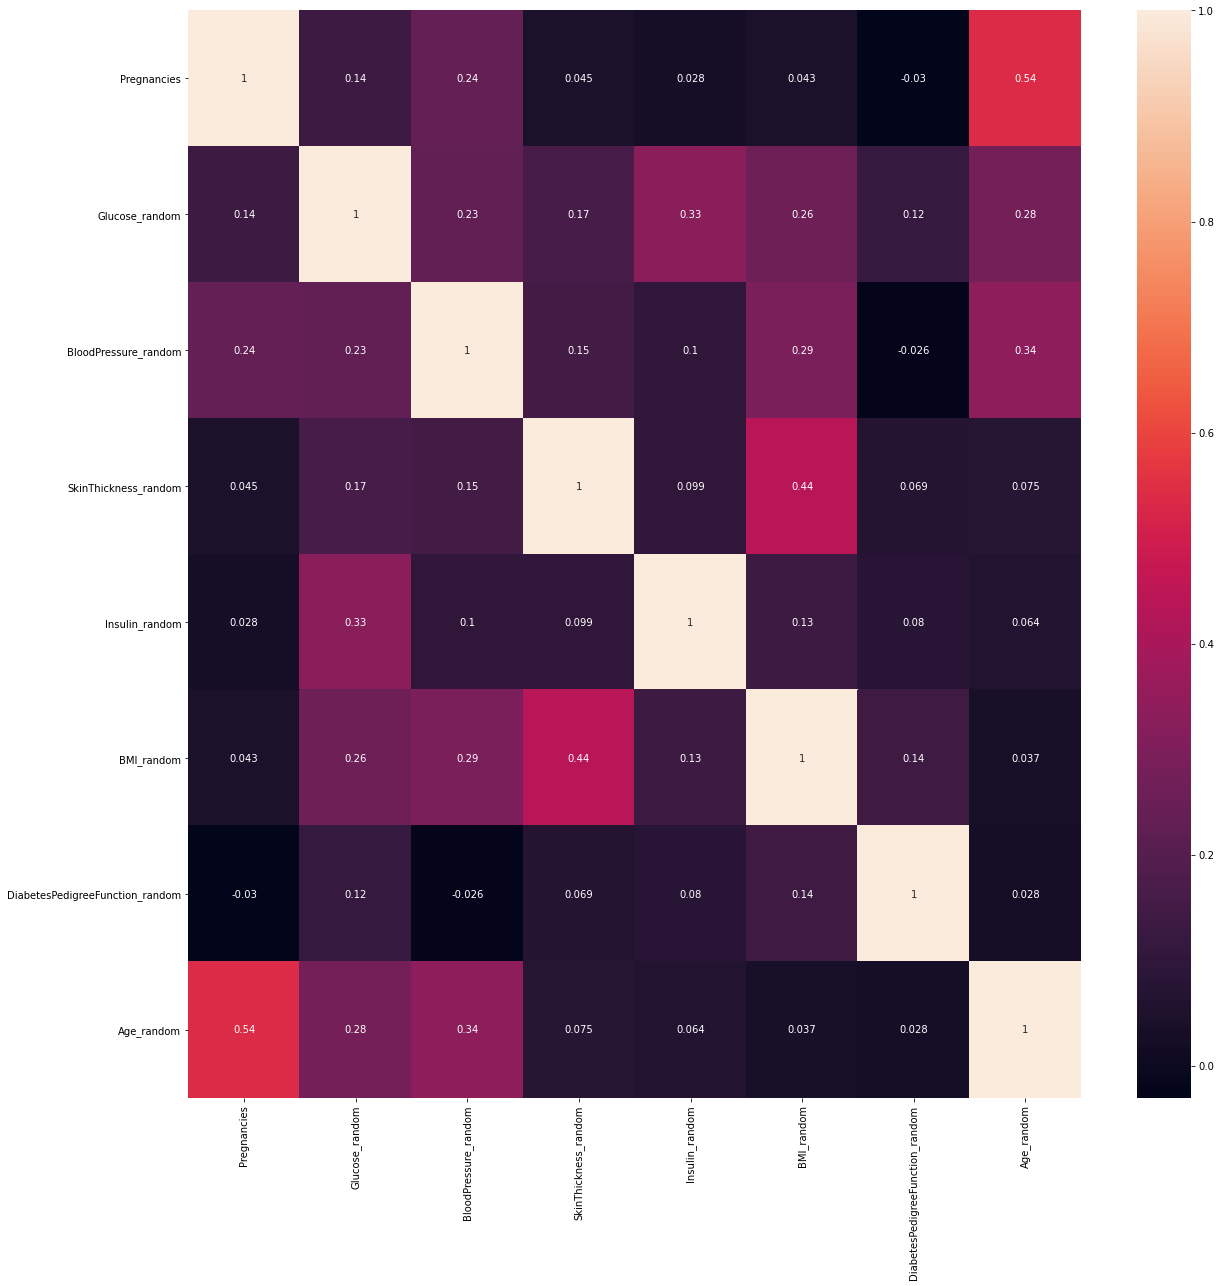

In [52]:
#feature selection
import seaborn as sns
#except last feature
corr=x.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)


In [53]:
threshold=.6

In [54]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns(unique)
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
correlation(x,threshold)#corelated feature either drop or use

set()

In [56]:
data.corr()

,Pregnancies,Outcome,Glucose_random,BloodPressure_random,SkinThickness_random,Insulin_random,BMI_random,DiabetesPedigreeFunction_random,Age_random
Pregnancies,1.000000,0.244356,0.138100,0.237756,0.044968,0.027722,0.043345,-0.030335,0.538023
Outcome,0.244356,1.000000,0.511355,0.198174,0.197345,0.165341,0.322093,0.191139,0.270905
Glucose_random,0.138100,0.511355,1.000000,0.228200,0.165539,0.325114,0.256805,0.117349,0.279167
BloodPressure_random,0.237756,0.198174,0.228200,1.000000,0.151773,0.100587,0.288073,-0.025800,0.337234
SkinThickness_random,0.044968,0.197345,0.165539,0.151773,1.000000,0.099037,0.436784,0.069315,0.074529
Insulin_random,0.027722,0.165341,0.325114,0.100587,0.099037,1.000000,0.134672,0.080489,0.064400
BMI_random,0.043345,0.322093,0.256805,0.288073,0.436784,0.134672,1.000000,0.140427,0.037219
DiabetesPedigreeFunction_random,-0.030335,0.191139,0.117349,-0.025800,0.069315,0.080489,0.140427,1.000000,0.028047
Age_random,0.538023,0.270905,0.279167,0.337234,0.074529,0.064400,0.037219,0.028047,1.000000


In [57]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)


ExtraTreesClassifier()

In [58]:
print(model.feature_importances_)

[0.10818076 0.22164347 0.08971373 0.09310478 0.09177988 0.13749615
 0.11626128 0.14181995]


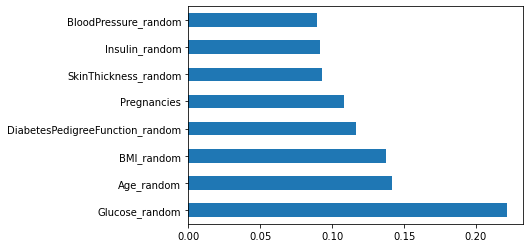

In [59]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

nd = StandardScaler()
nd.fit(x)
x =nd.transform(x)
print(y)


from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import model_selection
                  
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 100)


0      1
1      0
2      1
3      0
4      1
      ..
895    1
896    1
897    1
898    1
899    1
Name: Outcome, Length: 900, dtype: int64


In [61]:
print(x.shape,y.shape)

(900, 8) (900,)


C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:22:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

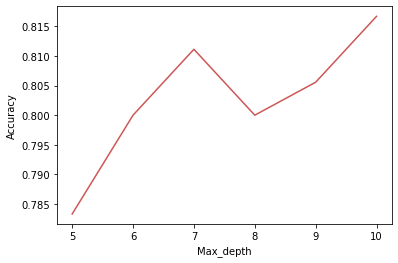

In [62]:
#to plot a graph
accuracies ={} 
means={}
randoms={}

#XGBOOST Classifier
#Manual Tuning
from xgboost import XGBClassifier
accuracy = []
for n in range(5,11):
    xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=n)
    xgb.fit(X_train,y_train)
    prediction = xgb.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediction))
print(accuracy)    
plt.plot(range(5,11), accuracy,color='#cd5555')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

In [64]:
xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=10)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
score=accuracy_score(y_test, prediction)
print(score)

[01:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8166666666666667


In [66]:

#Random forest
#RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,20),
    'min_samples_split': range(1,20),
    'n_estimators': [100, 200, 300,500,1000]}
rf=RandomForestClassifier()
rf_randomcv_model=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(rf_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(rf_randomcv_model.best_score_))
random=rf_randomcv_model.best_score_*100
randoms['Random Forest']=random

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.4s finished


{'n_estimators': 500, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 34}
rf_randomcv_model accuracy score = 0.7805555555555554


In [67]:
#knn
#RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors' : range(1,10)
   }
knn=KNeighborsClassifier()
knn_randomcv_model=RandomizedSearchCV(estimator=knn, param_distributions=knn_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(knn_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(knn_randomcv_model.best_score_))
random=knn_randomcv_model.best_score_*100
randoms['KNN']=random

C:\Users\Nidhi\anaconda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 9}
rf_randomcv_model accuracy score = 0.7597222222222222


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


In [68]:
#Decision tree
#RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dt_params = {'min_weight_fraction_leaf' : [0.0 , 0.2 , 0.4 , 0.6 ,0.8],
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,40),
    'max_leaf_nodes' : range(1,40)
    
    }
dt=DecisionTreeClassifier()
dt_randomcv_model=RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(dt_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(dt_randomcv_model.best_score_))
random=dt_randomcv_model.best_score_*100
randoms['Decision Tree']=random

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s


{'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 4, 'max_leaf_nodes': 14, 'max_features': 3, 'max_depth': 19}
rf_randomcv_model accuracy score = 0.7388888888888888


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


In [69]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr_params = {'penalty' : ['l1','l2', 'elasticnet','none'],
              'C' : range(1,7),
            'solver' :['newton-cg','lbfgs','liblinear','sag','saga'],
             'max_iter' : [100,200],
             'multi_class' : ['ovr','multinomial']
   }
lr=LogisticRegression()
lr_gridcv_model=GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(lr_gridcv_model.best_params_)
print('rf_gridcv_model accuracy score = {}'.format(lr_gridcv_model.best_score_)) 
random=lr_gridcv_model.best_score_*100
randoms['Logistic Regression']=random


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:    6.2s


{'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}
rf_gridcv_model accuracy score = 0.7486111111111111


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    8.6s finished
